In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
anes96 = sm.datasets.anes96
print(anes96.DESCRLONG)
dataset_anes96 = anes96.load_pandas()
df_anes96 = dataset_anes96.data




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This data is a subset of the American National Election Studies of 1996.


**1st Hypothesis:** Is the average of party identification of respondent on Independent-Democrat?

H1: The average of party identification of respondent is on Independent-Democrat.

H0: The average of party identification of respondent is not on Independent-Democrat.

{'boxes': [<matplotlib.lines.Line2D at 0x7f05238aaa90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f05238bbb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0523845b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0523845650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f05238bb0d0>,
  <matplotlib.lines.Line2D at 0x7f05238bb610>]}

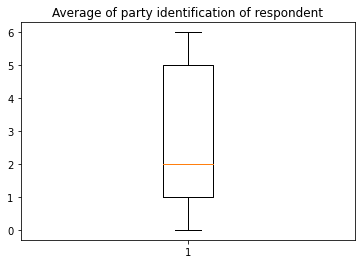

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

fig1, ax1 = plt.subplots()
ax1.set_title("Average of party identification of respondent")
ax1.boxplot(df_anes96["PID"])


We reject null hypothesis and conclude that the average of party identification of respondent is on Independent-Democrat.

**2nd Hypothesis:** Does data of age follow a hypothesized distribution?

H1: data of age follows a hypothesized distribution

H0: data of age does not follow a hypothesized distribution

Text(0, 0.5, 'Age')

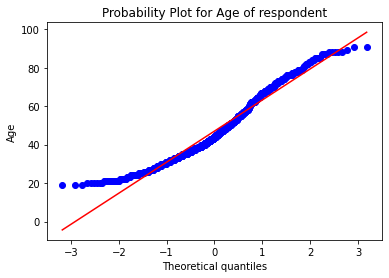

In [3]:
from scipy import stats
import scipy.stats as stats
fig = plt.figure()
res = stats.probplot (df_anes96 ['age'], plot = plt)
plt.title ('Probability Plot for Age of respondent')
plt.ylabel ("Age")

We reject null hypothesis and conclude that  the plot follows a straight line, it is reasonable to assume that the observed statistical sample comes from the specified distribution. Departures from this line indicate departures from that distribution.

3rd Hypothesis: the relationship between PID and age

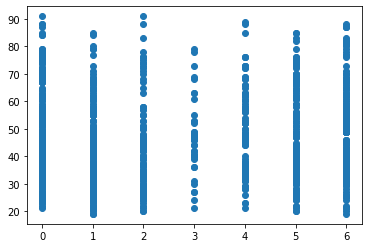

In [4]:
plt.scatter(df_anes96['PID'], df_anes96['age'])

Hypothesis Testing

In [5]:
#The mode of a set of data is the number with the highest frequency. 
#In the below example 0.0 of vote is the mode. 
#It means that Cliton votes  occurs with the highest frequency. 


subsetd = df_anes96[['popul','TVnews','PID','age','educ',
                    'income', 'vote']]
print(subsetd)

df_anes96.mode()


     popul  TVnews  PID   age  educ  income  vote
0      0.0     7.0  6.0  36.0   3.0     1.0   1.0
1    190.0     1.0  1.0  20.0   4.0     1.0   0.0
2     31.0     7.0  1.0  24.0   6.0     1.0   0.0
3     83.0     4.0  1.0  28.0   6.0     1.0   0.0
4    640.0     7.0  0.0  68.0   6.0     1.0   0.0
..     ...     ...  ...   ...   ...     ...   ...
939    0.0     7.0  4.0  73.0   6.0    24.0   1.0
940    0.0     7.0  6.0  50.0   6.0    24.0   1.0
941    0.0     3.0  5.0  43.0   6.0    24.0   1.0
942    0.0     6.0  6.0  46.0   7.0    24.0   1.0
943   18.0     7.0  3.0  61.0   7.0    24.0   1.0

[944 rows x 7 columns]


,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,4.0,2.0,6.0,0.0,35.0,3.0,21.0,0.0,-2.302585


In [6]:


from scipy.stats import shapiro
series_2test = df_anes96[['vote']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if stat > 0.5:
    print('Probably Clinton')
else:
    print('Probably Dole')


#Stat = 0.626, P (0.0) = 0.626, which is higher than 50%
#so, Clinton has the highest vote



stat=0.626, p=0.000
Probably Clinton


In [7]:
df_anes96['log_vote'] = np.log(df_anes96['vote'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


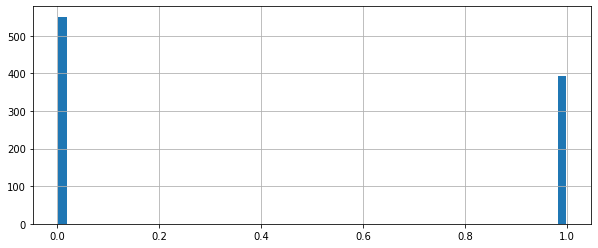

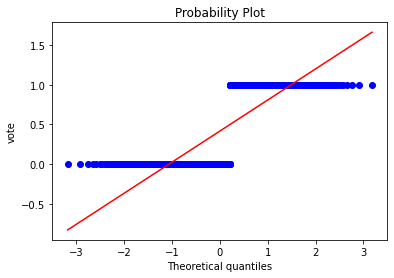

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


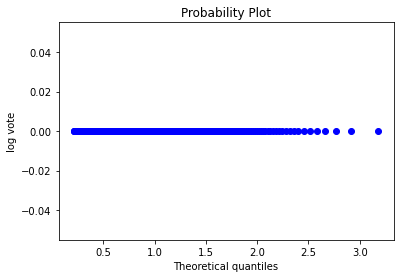

In [8]:
df_anes96['vote'].hist(bins=50, rwidth=.8, figsize=(10,4))
plt.show()
df_anes96['vote'].describe()

stats.probplot(df_anes96['vote'], plot=plt)
plt.ylabel('vote')
plt.show()
stats.probplot(np.log(df_anes96['vote']), plot=plt)
plt.ylabel('log vote')
plt.show()

#Clincon's Votes column (0.0) is higher than Dole's Votes Column(1.0)

REGRESSION

In [9]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['vote']
df_train = subsetd.drop(['vote'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
# Split data into train and test
anes96_train = pd.concat([x_train, y_train], axis=1)
#ames_train.head()
anes96_test = pd.concat([x_test, y_test], axis=1)

In [10]:
anes96_train.shape
anes96_test.shape

(312, 7)

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)
print(lin_reg.fit)
print(lin_reg.intercept_)
df_anes96 = pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Vote'])
df_anes96

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)>
-0.12195445281310968


,Vote
popul,-0.000008
TVnews,-0.000836
PID,0.167539
age,0.001043
educ,-0.007295
income,0.002538



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


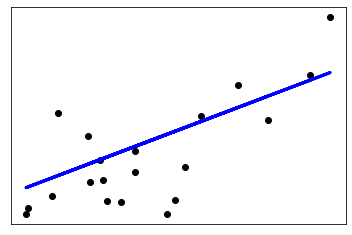

In [12]:
print()

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_anes96 = dataset_anes96.data
subsetd = df_anes96[['educ', 'PID']]
educ_X = subsetd.drop(['educ'], axis=1)
PID_y = subsetd.drop(['PID'], axis=1)


# NEED FIX HERE


# Load the dataset
educ_X, PID_y = datasets.load_diabetes (return_X_y=True)


# Use only one feature
educ_X = educ_X[:, np.newaxis, 2]

# Split the data into training/testing sets
educ_X_train = educ_X[:-20]
educ_X_test = educ_X[-20:]

# Split the targets into training/testing sets
PID_y_train = PID_y[:-20]
PID_y_test = PID_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(educ_X_train, PID_y_train)

# Make predictions using the testing set
PID_y_pred = regr.predict(educ_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(PID_y_test, PID_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(PID_y_test, PID_y_pred))

# Plot outputs
plt.scatter(educ_X_test, PID_y_test,  color='black')
plt.plot(educ_X_test, PID_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()